In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Lab | Natural Language Processing
### SMS: SPAM or HAM

### Let's prepare the environment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

- Read Data for the Fraudulent Email Kaggle Challenge
- Reduce the training set to speead up development.

In [3]:
## Read Data for the Fraudulent Email Kaggle Challenge
data_train = pd.read_csv("kg_train.csv",encoding='latin-1')
data_val = pd.read_csv("kg_test.csv",encoding='latin-1')

# Reduce the training set to speed up development.
# Modify for final system
data_train = data_train.head(1000)
print(data_train.shape)
data_train.fillna("",inplace=True)

(1000, 2)


<ipython-input-3-248e9509fecc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.fillna("",inplace=True)


## Data Preprocessing

In [4]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

print(string.punctuation)
print(stopwords.words("english")[100:110])
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer('english')

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Now, we have to clean the html code removing words

- First we remove inline JavaScript/CSS
- Then we remove html comments. This has to be done before removing regular tags since comments can contain '>' characters
- Next we can remove the remaining tags

In [5]:
# Your code

import re

def clean_html(html):

    # Remove inline JavaScript/CSS
    html = re.sub(r'<(script|style).*?>.*?</\1>', '', html, flags=re.DOTALL)

    # Remove HTML comments
    html = re.sub(r'<!--.*?-->', '', html, flags=re.DOTALL)

    # Remove remaining HTML tags
    html = re.sub(r'<[^>]+>', '', html)

    # Remove extra whitespace
    html = re.sub(r'\s+', ' ', html).strip()

    return html

# Clean dataset text
data_train['clean_text'] = data_train['text'].apply(clean_html)



- Remove all the special characters
    
- Remove numbers
    
- Remove all single characters

- Remove single characters from the start

- Substitute multiple spaces with single space

- Remove prefixed 'b'

- Convert to Lowercase

In [6]:
# Your code

def clean_text(text):
    # Remove all special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)

    # Remove single characters from the start
    text = re.sub(r'^[a-zA-Z]\s+', '', text)

    # Substitute multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    # Remove prefixed 'b' (e.g., bytes converted to strings)
    text = re.sub(r'\bb\b', '', text)

    # Convert to lowercase
    text = text.lower()

    return text

# Apply the updated cleaning function
data_train['clean_text'] = data_train['clean_text'].apply(clean_text)


## Now let's work on removing stopwords
Remove the stopwords.

In [7]:
# Your code

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()  # Tokenize the text into words
    words_filtered = [word for word in words if word not in stop_words]
    return ' '.join(words_filtered)  # Rejoin the filtered words

# Apply the stopword removal function
data_train['clean_text'] = data_train['clean_text'].apply(remove_stopwords)

## Tame Your Text with Lemmatization
Break sentences into words, then use lemmatization to reduce them to their base form (e.g., "running" becomes "run"). See how this creates cleaner data for analysis!

In [8]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

# Ensure the necessary NLTK resource is downloaded
nltk.download('punkt')

def tokenize_text(text):
    """
    Tokenizes text into words.
    """
    return word_tokenize(text)

# Apply tokenization
data_train['tokenized_text'] = data_train['clean_text'].apply(tokenize_text)

# Display a sample of the tokenized text
print(data_train[['clean_text', 'tokenized_text']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                          clean_text  \
0  dear sir strictly private business proposal mi...   
1                                                      
2  noracheryl emailed dozens memos haiti weekend ...   
3  dear sirfmadamc know proposal might surprise e...   
4                                                fyi   

                                      tokenized_text  
0  [dear, sir, strictly, private, business, propo...  
1                                                 []  
2  [noracheryl, emailed, dozens, memos, haiti, we...  
3  [dear, sirfmadamc, know, proposal, might, surp...  
4                                              [fyi]  


In [9]:
from nltk.stem import WordNetLemmatizer
import nltk

# Download required resources
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # Optional: for extended WordNet resources
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    """
    Lemmatizes a list of tokens.
    """
    return [lemmatizer.lemmatize(token) for token in tokens]

  # Apply lemmatization to the tokenized text
data_train['lemmatized_text'] = data_train['tokenized_text'].apply(lemmatize_tokens)

# Display a sample of lemmatized text
print(data_train[['tokenized_text', 'lemmatized_text']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                                      tokenized_text  \
0  [dear, sir, strictly, private, business, propo...   
1                                                 []   
2  [noracheryl, emailed, dozens, memos, haiti, we...   
3  [dear, sirfmadamc, know, proposal, might, surp...   
4                                              [fyi]   

                                     lemmatized_text  
0  [dear, sir, strictly, private, business, propo...  
1                                                 []  
2  [noracheryl, emailed, dozen, memo, haiti, week...  
3  [dear, sirfmadamc, know, proposal, might, surp...  
4                                              [fyi]  


In [10]:
from nltk import pos_tag
from nltk.corpus import wordnet

def get_wordnet_pos(tag):
    """
    Map NLTK POS tags to WordNet POS tags.
    """
    if tag.startswith('J'):
        return wordnet.ADJ  # Adjective
    elif tag.startswith('V'):
        return wordnet.VERB  # Verb
    elif tag.startswith('N'):
        return wordnet.NOUN  # Noun
    elif tag.startswith('R'):
        return wordnet.ADV  # Adverb
    else:
        return wordnet.NOUN  # Default to noun

In [11]:
def lemmatize_with_pos(tokens):
    """
    Lemmatize tokens with POS tagging.
    """
    # Get POS tags for each token
    pos_tags = pos_tag(tokens)

    # Lemmatize each token with the corresponding POS tag
    return [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]


In [12]:
nltk.download('averaged_perceptron_tagger_eng')
# Apply lemmatization with POS tagging
data_train['lemmatized_text'] = data_train['tokenized_text'].apply(lemmatize_with_pos)

# Display a sample of lemmatized text
print(data_train[['tokenized_text', 'lemmatized_text']].head())


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


                                      tokenized_text  \
0  [dear, sir, strictly, private, business, propo...   
1                                                 []   
2  [noracheryl, emailed, dozens, memos, haiti, we...   
3  [dear, sirfmadamc, know, proposal, might, surp...   
4                                              [fyi]   

                                     lemmatized_text  
0  [dear, sir, strictly, private, business, propo...  
1                                                 []  
2  [noracheryl, email, dozen, memo, haiti, weeken...  
3  [dear, sirfmadamc, know, proposal, might, surp...  
4                                              [fyi]  


## Bag Of Words
Let's get the 10 top words in ham and spam messages (**EXPLORATORY DATA ANALYSIS**)

In [13]:
# Your code
# Remove rows where 'lemmatized_text' is empty or not a list
data = data_train[data_train['lemmatized_text'].str.len() > 0]  # Keep only rows with non-empty lists

# Join the tokens in 'lemmatized_text' into a single string for each row
data_train['lemmatized_text_str'] = data_train['lemmatized_text'].apply(lambda tokens: " ".join(tokens))

# Join the tokens in 'lemmatized_text' into a single string for each row
data_train['lemmatized_text_str'] = data_train['lemmatized_text'].apply(lambda tokens: " ".join(tokens))


# Separate ham and spam messages
ham_messages = data_train[data_train['label'] == 0]['lemmatized_text_str']
spam_messages = data_train[data_train['label'] == 1]['lemmatized_text_str']


from collections import Counter

# Count word frequencies in ham messages
ham_word_counts = Counter(" ".join(ham_messages).split())

# Count word frequencies in spam messages
spam_word_counts = Counter(" ".join(spam_messages).split())

# Get the top 10 words
top_ham_words = ham_word_counts.most_common(10)
top_spam_words = spam_word_counts.most_common(10)

print("Top 10 Words in Ham Messages:")
print(top_ham_words)

print("\nTop 10 Words in Spam Messages:")
print(top_spam_words)


Top 10 Words in Ham Messages:
[('u', 115), ('pm', 115), ('call', 111), ('would', 106), ('work', 104), ('say', 103), ('state', 103), ('president', 94), ('get', 86), ('time', 85)]

Top 10 Words in Spam Messages:
[('money', 920), ('account', 805), ('bank', 758), ('fund', 707), ('u', 550), ('transfer', 524), ('business', 473), ('contact', 435), ('transaction', 416), ('country', 402)]


## Extra features

In [15]:
# We add to the original dataframe two additional indicators (money symbols and suspicious words).


money_simbol_list = "|".join(["euro","dollar","pound","€","$"])
suspicious_words = "|".join(["free","cheap","sex","money","account","bank","fund","transfer","transaction","win","deposit","password"])

data_train['money_mark'] = data_train['clean_text'].str.contains(money_simbol_list)*1
data_train['suspicious_words'] = data_train['clean_text'].str.contains(suspicious_words)*1
data_train['text_len'] = data_train['clean_text'].apply(lambda x: len(x))

data_val['money_mark'] = data_val['text'].str.contains(money_simbol_list)*1
data_val['suspicious_words'] = data_val['text'].str.contains(suspicious_words)*1
data_val['text_len'] = data_val['text'].apply(lambda x: len(x))

data_train.head()

,text,label,clean_text,tokenized_text,lemmatized_text,lemmatized_text_str,money_mark,suspicious_words,text_len
0,"DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...",1,dear sir strictly private business proposal mi...,"[dear, sir, strictly, private, business, propo...","[dear, sir, strictly, private, business, propo...",dear sir strictly private business proposal mi...,1,1,1526
1,Will do.,0,,[],[],,1,0,0
2,Nora--Cheryl has emailed dozens of memos about...,0,noracheryl emailed dozens memos haiti weekend ...,"[noracheryl, emailed, dozens, memos, haiti, we...","[noracheryl, email, dozen, memo, haiti, weeken...",noracheryl email dozen memo haiti weekend plea...,1,0,112
3,Dear Sir=2FMadam=2C I know that this proposal ...,1,dear sirfmadamc know proposal might surprise e...,"[dear, sirfmadamc, know, proposal, might, surp...","[dear, sirfmadamc, know, proposal, might, surp...",dear sirfmadamc know proposal might surprise e...,1,1,1392
4,fyi,0,fyi,[fyi],[fyi],fyi,1,0,3


## How would you create a Bag of Words with the CountVectorizer method?

In [16]:
# Your code
from sklearn.feature_extraction.text import CountVectorizer

# Combine 'lemmatized_text_str' into a single column to feed into CountVectorizer
corpus = data_train['lemmatized_text_str'].values.astype('U')  # Ensure all text is string

# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')  # Limit to 1000 features, remove stop words

# Fit and transform the text data
X_bow = vectorizer.fit_transform(corpus)

# Convert the BoW matrix to a DataFrame for visualization
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Inspect the resulting Bag of Words
print(bow_df.head())


   abacha  abandon  abidjan  able  abroad  absolute  ac  accept  acceptable  \
0       0        1        0     0       0         0   0       0           0   
1       0        0        0     0       0         0   0       0           0   
2       0        0        0     0       0         0   0       0           0   
3       0        0        0     0       0         0   0       1           0   
4       0        0        0     0       0         0   0       0           0   

   acceptance  ...  yahoo  year  yes  york  youc  youe  youi  young  zimbabwe  \
0           0  ...      0     0    0     0     0     0     0      0         0   
1           0  ...      0     0    0     0     0     0     0      0         0   
2           0  ...      0     0    0     0     0     0     0      0         0   
3           1  ...      0     0    0     0     0     0     0      0         0   
4           0  ...      0     0    0     0     0     0     0      0         0   

   zimbabwean  
0           0  
1     

## TD-IDF

- Load the vectorizer

- Vectorize all dataset

- print the shape of the vetorized dataset

In [17]:
# Your code

from sklearn.feature_extraction.text import TfidfVectorizer

# Combine 'lemmatized_text_str' into a single column if not already done
corpus = data_train['lemmatized_text_str'].values.astype('U')  # Ensure text is string

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 1))

# Fit and transform the dataset
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

# Print the shape of the TF-IDF matrix
print("Shape of the TF-IDF vectorized dataset:", X_tfidf.shape)

Shape of the TF-IDF vectorized dataset: (1000, 1000)


In [18]:
# Display feature names (words)
print("Feature Names:", tfidf_vectorizer.get_feature_names_out())

# Convert to dense format and create a DataFrame for visualization
import pandas as pd
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

Feature Names: ['abacha' 'abandon' 'abidjan' 'able' 'abroad' 'absolute' 'ac' 'accept'
 'acceptable' 'acceptance' 'access' 'accord' 'account' 'accountant'
 'accounti' 'accuse' 'acknowledge' 'acquire' 'act' 'action' 'actual'
 'actually' 'add' 'address' 'administration' 'advice' 'advise' 'adviser'
 'affair' 'affect' 'afghan' 'afghanistan' 'africa' 'african' 'age' 'agent'
 'ago' 'agree' 'agreement' 'ahead' 'ahmed' 'aid' 'air' 'airport' 'al'
 'alive' 'allah' 'allow' 'ally' 'alternative' 'ambassador' 'america'
 'american' 'anticipation' 'anybody' 'application' 'applies' 'apply'
 'appreciate' 'appropriate' 'approval' 'approve' 'april' 'area' 'arise'
 'arm' 'arrange' 'arrangement' 'arrival' 'arrive' 'aside' 'ask' 'asset'
 'assist' 'assistance' 'assistant' 'associate' 'assurance' 'assure'
 'asylum' 'attach' 'attack' 'attempt' 'attention' 'attorney' 'audit'
 'auditor' 'august' 'authority' 'available' 'average' 'avoid' 'await'
 'award' 'aware' 'away' 'bad' 'balance' 'bank' 'banking' 'barack'
 'ba

### Extra Task (optional) - Implement a SPAM/HAM classifier

https://www.kaggle.com/t/b384e34013d54d238490103bc3c360ce

Use a MultinimialNB with default parameters.

Your task is to find the **best feature representation**.

You can work with teams of two persons (recommended).

In [19]:
# Your code

data_train.head()


,text,label,clean_text,tokenized_text,lemmatized_text,lemmatized_text_str,money_mark,suspicious_words,text_len
0,"DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...",1,dear sir strictly private business proposal mi...,"[dear, sir, strictly, private, business, propo...","[dear, sir, strictly, private, business, propo...",dear sir strictly private business proposal mi...,1,1,1526
1,Will do.,0,,[],[],,1,0,0
2,Nora--Cheryl has emailed dozens of memos about...,0,noracheryl emailed dozens memos haiti weekend ...,"[noracheryl, emailed, dozens, memos, haiti, we...","[noracheryl, email, dozen, memo, haiti, weeken...",noracheryl email dozen memo haiti weekend plea...,1,0,112
3,Dear Sir=2FMadam=2C I know that this proposal ...,1,dear sirfmadamc know proposal might surprise e...,"[dear, sirfmadamc, know, proposal, might, surp...","[dear, sirfmadamc, know, proposal, might, surp...",dear sirfmadamc know proposal might surprise e...,1,1,1392
4,fyi,0,fyi,[fyi],[fyi],fyi,1,0,3


In [20]:
data_val.head()

,text,money_mark,suspicious_words,text_len
0,usiness is for the fact that the deceased man ...,1,1,1368
1,They are happy to adjust to the afternoon. I a...,1,0,170
2,Lael Brainard was confirmed 78-19 this afterno...,1,0,201
3,H <hrod17@clintonemail.com>Friday March 26 201...,1,0,115
4,"n;""> Dear Good Friend,<br><br><br>I am happy t...",1,1,1518


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import numpy as np

# 1. Prepare text and custom features
X_text = data_train['lemmatized_text_str'].values.astype('U')  # Ensure text is string
X_custom = data_train[['money_mark', 'suspicious_words', 'text_len']].values  # Custom features
y = data_train['label']  # Labels (0 = ham, 1 = spam)

# 2. Split into training and testing sets
X_text_train, X_text_test, X_custom_train, X_custom_test, y_train, y_test = train_test_split(
    X_text, X_custom, y, test_size=0.3, random_state=42
)

# 3. TF-IDF Transformation
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf_train = tfidf_vectorizer.fit_transform(X_text_train)
X_tfidf_test = tfidf_vectorizer.transform(X_text_test)

# 4. Combine TF-IDF with custom features (optional)
from scipy.sparse import hstack
X_train_combined = hstack([X_tfidf_train, X_custom_train])
X_test_combined = hstack([X_tfidf_test, X_custom_test])

# 5. Train the MultinomialNB Classifier
model = MultinomialNB()
model.fit(X_train_combined, y_train)

# 6. Evaluate the Model
y_pred = model.predict(X_test_combined)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       173
           1       0.96      0.92      0.94       127

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [23]:
import pandas as pd
import numpy as np

# Combine TF-IDF features with custom features
feature_names = list(tfidf_vectorizer.get_feature_names_out()) + ['money_mark', 'suspicious_words', 'text_len']

# Extract log probabilities of features for each class
log_probs = model.feature_log_prob_

# Compute importance by taking the difference between spam and ham probabilities
importance = log_probs[1] - log_probs[0]  # Spam (class 1) minus Ham (class 0)

# Create a DataFrame to analyze feature importance
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
print(feature_importances.sort_values(by='Importance', ascending=False).head(10))
print("\nLeast important features:")
print(feature_importances.sort_values(by='Importance', ascending=True).head(10))


         Feature  Importance
559        money    1.716638
89          bank    1.698986
11       account    1.668622
371         fund    1.567944
913     transfer    1.408980
910  transaction    1.289744
251      deposit    1.127943
180      company    1.106190
477          kin    1.086723
201      contact    0.958859

Least important features:
       Feature  Importance
374        fyi   -4.965056
613         ok   -3.727378
905   tomorrow   -3.669702
669        pls   -3.628011
670         pm   -3.485302
150     cheryl   -3.440093
882       talk   -3.406634
819  september   -3.133426
692      print   -3.076844
969  wednesday   -3.076655


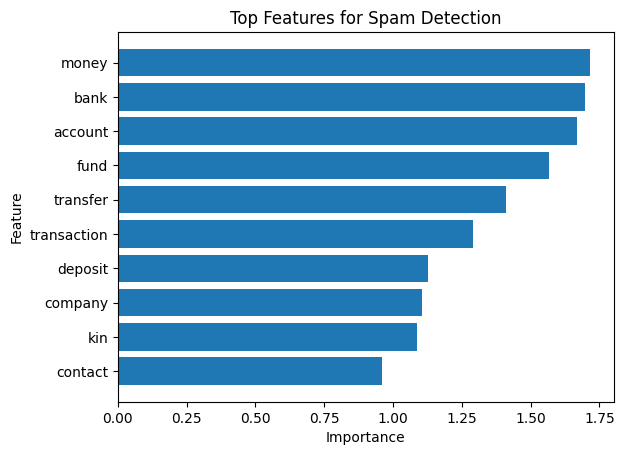

In [24]:
import matplotlib.pyplot as plt

# Top 10 features
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(10)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Features for Spam Detection')
plt.gca().invert_yaxis()
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_combined, y_train)
lr_pred = lr_model.predict(X_test_combined)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined, y_train)
rf_pred = rf_model.predict(X_test_combined)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate MultinomialNB
nb_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, model.predict_proba(X_test_combined)[:, 1])
}

# Evaluate Logistic Regression
lr_metrics = {
    'Accuracy': accuracy_score(y_test, lr_pred),
    'Precision': precision_score(y_test, lr_pred),
    'Recall': recall_score(y_test, lr_pred),
    'F1-Score': f1_score(y_test, lr_pred),
    'ROC-AUC': roc_auc_score(y_test, lr_model.predict_proba(X_test_combined)[:, 1])
}

# Evaluate Random Forest
rf_metrics = {
    'Accuracy': accuracy_score(y_test, rf_pred),
    'Precision': precision_score(y_test, rf_pred),
    'Recall': recall_score(y_test, rf_pred),
    'F1-Score': f1_score(y_test, rf_pred),
    'ROC-AUC': roc_auc_score(y_test, rf_model.predict_proba(X_test_combined)[:, 1])
}

# Combine results into a DataFrame for comparison
import pandas as pd
results = pd.DataFrame([nb_metrics, lr_metrics, rf_metrics], index=['MultinomialNB', 'LogisticRegression', 'RandomForest'])
print(results)

                    Accuracy  Precision    Recall  F1-Score   ROC-AUC
MultinomialNB       0.950000   0.959016  0.921260  0.939759  0.976810
LogisticRegression  0.930000   0.949153  0.881890  0.914286  0.987233
RandomForest        0.953333   0.937984  0.952756  0.945312  0.992217


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_combined, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Best parameters: {'alpha': 0.1}
Best F1-Score: 0.920902613784808
